# Conclusion: Best Practices and Future Trends in Options Trading

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Load the Libs we need

In [1]:
# import Lib
import numpy as np
import pandas as pd
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# import module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from stable_baselines3 import A2C
from stable_baselines3 import PPO

## Recap of Key Concepts and Best Practices

In [2]:
# Loading mb_tickerdf05192023 2024-04-11 10-56-23-012114
# Define the file path
file_path = "mb_tickerdf05192023 2024-04-11 10-56-23-012114.csv"

# Load the file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-04-11 00:00:00-04:00,48.339525,48.375624,47.759497,47.882240,83603200,0.0,0.0
1,2019-04-12 00:00:00-04:00,47.942411,48.168645,47.222795,47.862988,111042800,0.0,0.0
2,2019-04-15 00:00:00-04:00,47.793182,48.098840,47.655996,47.949619,70146400,0.0,0.0
3,2019-04-16 00:00:00-04:00,48.004984,48.464670,47.788375,47.954441,102785600,0.0,0.0
4,2019-04-17 00:00:00-04:00,48.024231,48.948425,47.800405,48.888256,115627200,0.0,0.0


In [3]:
# Get Data
data = df.copy()

# Compute daily returns
data['Returns'] = data['Close'].pct_change()

# Assume an option's delta is 0.5
delta = 0.5

# Calculate required hedge for each day
data['Hedge'] = -delta * data['Returns']

# Compute cumulative returns of the hedge
data['Cumulative Hedge Returns'] = np.cumprod(1 + data['Hedge'].fillna(0))

data[['Close', 'Hedge', 'Cumulative Hedge Returns']]

,Close,Hedge,Cumulative Hedge Returns
0,47.882240,NaN,1.000000
1,47.862988,0.000201,1.000201
2,47.949619,-0.000905,0.999296
3,47.954441,-0.000050,0.999246
4,48.888256,-0.009736,0.989516
...,...,...,...
1254,169.580002,-0.002251,0.439783
1255,168.449997,0.003332,0.441248
1256,169.669998,-0.003621,0.439651
1257,167.779999,0.005570,0.442099


## Machine Learning and AI in Options Valuation

### Predictive analytics

In [4]:
# Using past 5 days to predict the next day's closing price
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Feature columns: using Open, High, Low, Close as features
features = df[['Open', 'High', 'Low', 'Close']]
target = df['Target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 5.7150


### Neural Networks for Nonlinear Relationships in Options Pricing

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2943 - val_loss: 0.0872
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0933 - val_loss: 0.0825
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0919 - val_loss: 0.0825
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851 - val_loss: 0.0833
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0895 - val_loss: 0.0820
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 - val_loss: 0.0808
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0825 - val_loss: 0.0772
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0844 - val_loss: 0.0833
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0804 - val_loss: 0.0837
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0818 - val_loss: 0.0801
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810 - val_loss: 0.0816
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

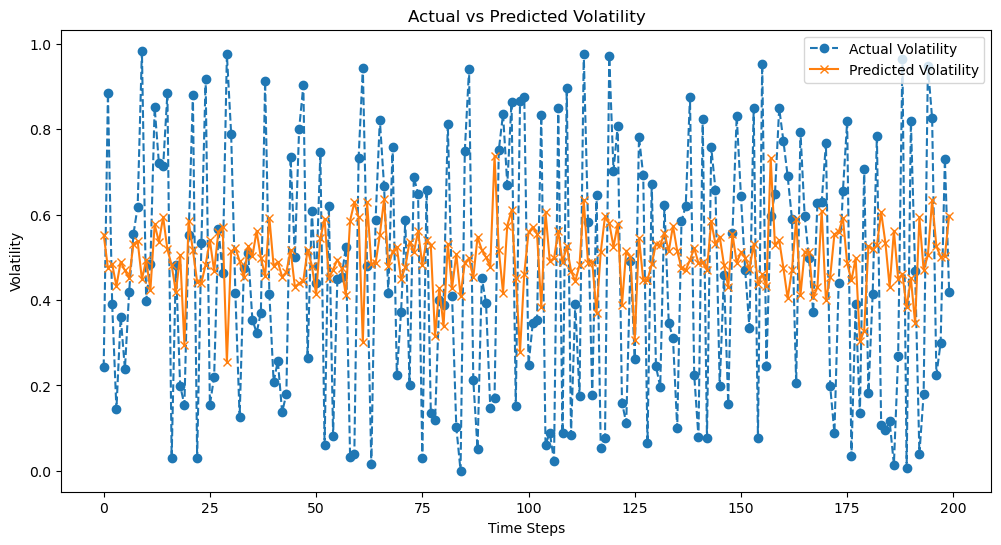

In [5]:
# Generating synthetic data for option pricing (e.g., Black-Scholes model outputs)
X = np.random.rand(1000, 3)  # Features: [Underlying Price, Volatility, Time to Maturity]
y = np.random.rand(1000, 1)  # Option Prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Neural Network model
model = Sequential()

# Add an Input layer as the first layer
model.add(Input(shape=(3,)))

# Add subsequent layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Predicting option prices
predictions = model.predict(X_test)

# Plotting the actual vs predicted volatility
plt.figure(figsize=(12, 6))

# Plot the actual volatility values
plt.plot(y_test, label="Actual Volatility", linestyle='--', marker='o')

# Plot the predicted volatility values
plt.plot(predictions, label="Predicted Volatility", linestyle='-', marker='x')

# Adding title and labels
plt.title("Actual vs Predicted Volatility")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")
plt.legend()
plt.show()


### Neural Networks for Time Series Forecasting in Options Pricing

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1206 - val_loss: 0.0897
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0885 - val_loss: 0.0911
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0919 - val_loss: 0.0901
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0839 - val_loss: 0.0873
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0780 - val_loss: 0.0868
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0857 - val_loss: 0.0864
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0840 - val_loss: 0.0867
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0816 - val_loss: 0.0861
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0844 - val_loss: 0.0891
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0827 - val_loss: 0.0859
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0810 - val_loss: 0.0871
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0800 - val_l

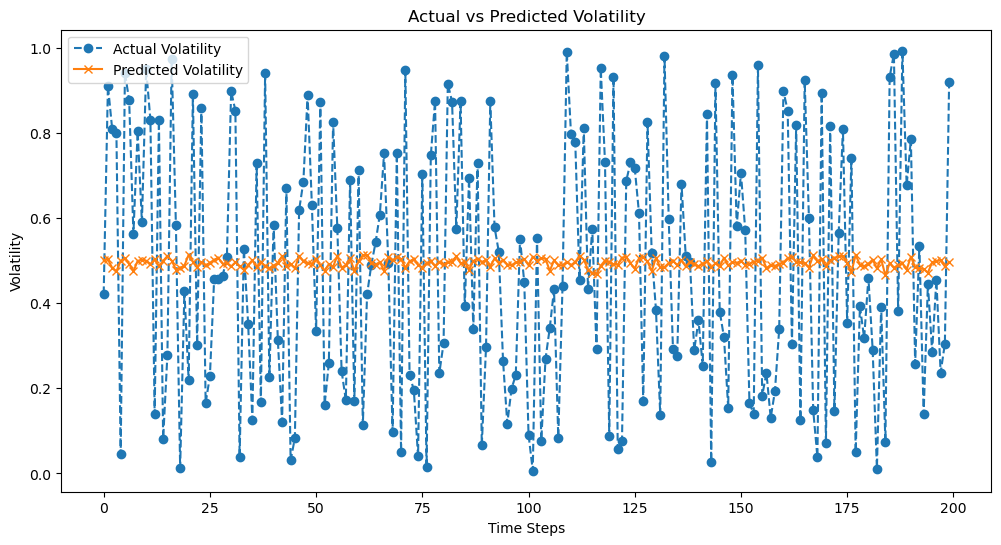

In [6]:
# Assuming X is the time series data for historical volatility
X = np.random.rand(1000, 10, 1)  # Shape: [Samples, Time Steps, Features]
y = np.random.rand(1000, 1)  # Future volatility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential()

# Add an Input layer for LSTM
model.add(Input(shape=(10, 1)))

# Add LSTM and Dense layers
model.add(LSTM(50))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

# Predicting future volatility
predictions = model.predict(X_test)

# Plotting the actual vs predicted volatility
plt.figure(figsize=(12, 6))

# Plot the actual volatility values
plt.plot(y_test, label="Actual Volatility", linestyle='--', marker='o')

# Plot the predicted volatility values
plt.plot(predictions, label="Predicted Volatility", linestyle='-', marker='x')

# Adding title and labels
plt.title("Actual vs Predicted Volatility")
plt.xlabel("Time Steps")
plt.ylabel("Volatility")
plt.legend()
plt.show()

### Reinforcement Learning for Dynamic Hedging

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 1440 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 971         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017842239 |
|    clip_fraction        | 0.259       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | -0.00575    |
|    learning_rate        | 0.0003      |
|    loss                 | 4           |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0316     |
|    value_loss         

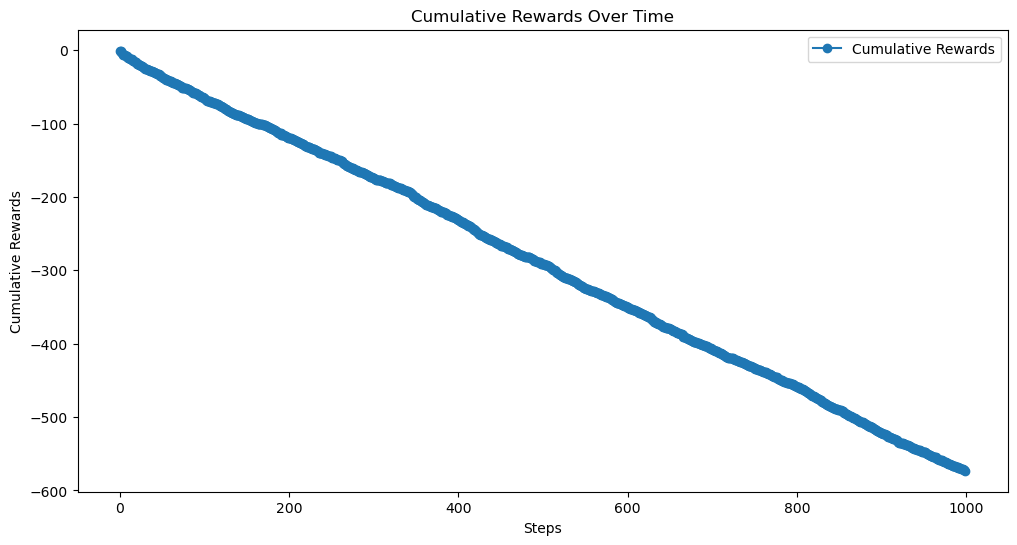

In [7]:
class HedgingEnv(gym.Env):
    def __init__(self):
        super(HedgingEnv, self).__init__()
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(4,))
        self.action_space = gym.spaces.Discrete(3)

    def reset(self, seed=None, options=None):
        if seed is not None:
            np.random.seed(seed)
        self.state = np.random.rand(4)
        return self.state, {}  # Return state and empty info dictionary

    def step(self, action):
        self.state = np.random.rand(4)
        reward = -np.abs(self.state[0] - action)
        terminated = False  # Replace this with your logic to check if the episode is done
        truncated = False  # Replace this with your logic to check if the episode was truncated
        info = {}  # Additional information, if necessary

        return self.state, reward, terminated, truncated, info  # Ensure 5 values are returned

# Create environment
env = HedgingEnv()

# Using PPO (Proximal Policy Optimization) algorithm to train the RL agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Simulate the agent in the environment and collect rewards
obs, _ = env.reset()
rewards_list = []

for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, terminated, truncated, info = env.step(action)
    rewards_list.append(rewards)
    if terminated or truncated:
        break

# Plotting the cumulative rewards over time
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(rewards_list), label="Cumulative Rewards", linestyle='-', marker='o')
plt.title("Cumulative Rewards Over Time")
plt.xlabel("Steps")
plt.ylabel("Cumulative Rewards")
plt.legend()
plt.show()


### Reinforcement Learning for Portfolio Optimization

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 515      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.0726  |
|    explained_variance | -0.0716  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0174   |
|    value_loss         | 3.9      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 537      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.0519  |
|    explained_variance | -19.8    |
|    learning_rate      | 0.0007   |
|    n_updates    

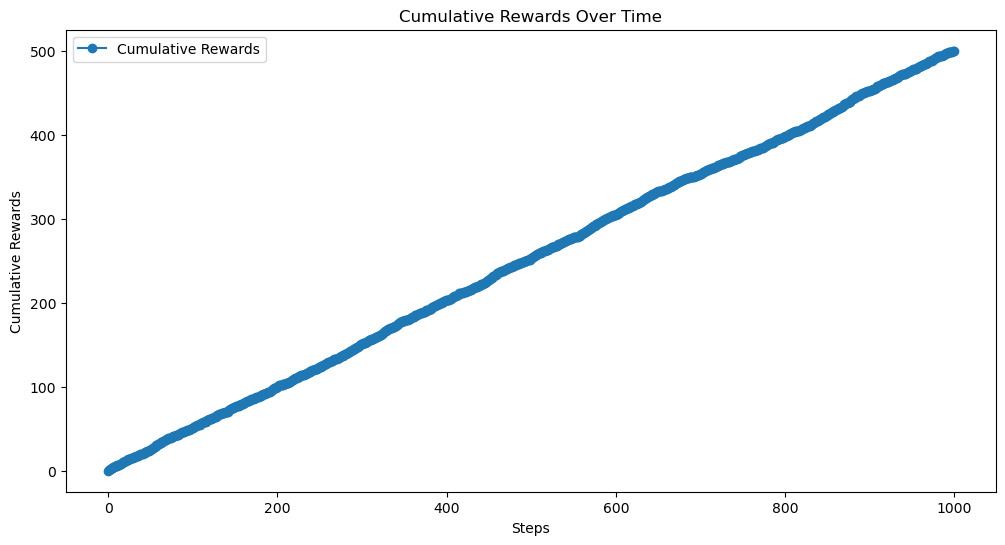

In [8]:
class PortfolioEnv(gym.Env):
    def __init__(self):
        super(PortfolioEnv, self).__init__()
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(5,))
        self.action_space = gym.spaces.Discrete(5)

    def reset(self, seed=None, options=None):
        if seed is not None:
            np.random.seed(seed)
        self.state = np.random.rand(5)
        return self.state, {}  # Return state and empty info dictionary

    def step(self, action):
        self.state = np.random.rand(5)
        reward = self.state[0] - action  # Simplified reward function
        terminated = False  # Replace with logic to check if episode ends
        truncated = False  # Replace with logic to check if episode was truncated
        info = {}  # Additional information, if necessary

        return self.state, reward, terminated, truncated, info  # Ensure 5 values are returned

# Create environment
env = PortfolioEnv()

# Using A2C (Advantage Actor Critic) algorithm to train the RL agent
model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Simulate the agent in the environment and collect rewards
obs, _ = env.reset()
rewards_list = []

for _ in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, terminated, truncated, info = env.step(action)
    rewards_list.append(rewards)
    if terminated or truncated:
        break

# Plotting the cumulative rewards over time
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(rewards_list), label="Cumulative Rewards", linestyle='-', marker='o')
plt.title("Cumulative Rewards Over Time")
plt.xlabel("Steps")
plt.ylabel("Cumulative Rewards")
plt.legend()
plt.show()
